# Deep Learning and Applications : Joint Faculty Development Programme
# May 27 -31, 2019 

**Participating Academies : IIT Roorkee ,  MNIT Jaipur, NIT Patna, PDPM IIITDM Jabalpur  **

**Prinicipal Coordinating Academies : IIT Roorkee and PDPM IIITDM Jabalpur**

# Tutorial 3: Introduction to Convolution Neural Networks
** In this tutorial, we provide you a brief introduction to Convolution Neural Networks(CNNs). You will be able to build a CNN model that can be used for classification.**


Convolution Neural Networks are mainly use for large size input data such as Image data. 
* Convolution Neural Networks (CNNs) use parameter sharing.
* Small pattern detectors called filters are used to convolve over the entire image.
* These filters are learned through NN training in the same way as in fully connected networks.
* Just like a hidden layer in a fully connected layer, convolution layers are used in CNNs.
* To handle large size of image data, pooling layers are introduced.
* Normalization layers were used in early CNN architectures, but due to their minimal impact, they are not much used in the present CNNs.


** Today we are going to see a simple 3 convolution layers convolution neural network. We are going to use PlantVillage leaf 
dataset. It contains 38 classes dataset. From which we are just going to use 4 classes of Apple. The objective of the work is to Diseases classification in Apple leaves.**

Dataset Link : :https://github.com/spMohanty/PlantVillage-Dataset/tree/master/raw/color
We split the dataset into training validation and testing sample

### A. Data Preprocessing

** A1. Import required Libraries **
* From keras library we are going to use image preprocessing task, to normalize the image pixel values in between 0 to 1.
* Model is imported to load variuos Neural NEtwrok models such as Sequential.
* We are going to use Stochastic Gradient Descent(SGD) as a optimizer 
* Keras layers such as Dense, Flatten, Conv2D and MaxPooling is used to implement the CNN model 

In [72]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import SGD
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from keras import Input
                                                                                                            


** A2. Loading the training and testing data and defining the basic parameters **
* We are resizing the input image to 64 * 64

* In the dataset :
    Training Set : 70% 
    Validation Set : 20%
    Test Set : 10%

In [73]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'plant_village/train/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'plant_village/val/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'plant_village/test/',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)


Found 2217 images belonging to 4 classes.
Found 635 images belonging to 4 classes.
Found 319 images belonging to 4 classes.


### B. Model Building


* We are going to use 2 convolution layers with 3*3 filer and relu as an activation function
* Then max pooling layer with 2*2 filter is used
* After that we are going to use Flatten layer
* Then Dense layer is used with relu function
* In the output layer softmax function is used with 4 neurons as we have four class dataset.
* model.summary() is used to check the overall architecture of the model with number of learnable parameters in each 

#### B1. Model Definition

In [74]:
# Create the model
model = models.Sequential()
# Add new layers
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2304)              0         
__________

### B2. Compile the model with SGD(Stochastic Gradient Descent) and train it with 10 epochs.

In [75]:
sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(sgd, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit_generator(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10
139/138 [==============================] - 59s 422ms/step - loss: 1.2047 - acc: 0.5077 - val_loss: 1.1609 - val_acc: 0.5181
Epoch 2/10
139/138 [==============================] - 61s 439ms/step - loss: 1.1278 - acc: 0.5237 - val_loss: 1.0963 - val_acc: 0.5780
Epoch 3/10
139/138 [==============================] - 57s 411ms/step - loss: 0.9346 - acc: 0.6093 - val_loss: 0.7740 - val_acc: 0.6646
Epoch 4/10
139/138 [==============================] - 57s 411ms/step - loss: 0.6303 - acc: 0.7636 - val_loss: 0.5770 - val_acc: 0.7685
Epoch 5/10
139/138 [==============================] - 58s 418ms/step - loss: 0.4677 - acc: 0.8336 - val_loss: 0.4226 - val_acc: 0.8567
Epoch 6/10
139/138 [==============================] - 67s 479ms/step - loss: 0.3922 - acc: 0.8534 - val_loss: 0.4503 - val_acc: 0.8331
Epoch 7/10
139/138 [==============================] - 62s 449ms/step - loss: 0.3642 - acc: 0.8688 - val_loss: 0.3694 - val_acc: 0.8661
Epoch 8/10
139/138 [==============================] - 6

### B3. Saving the model


In [76]:
model.save('cnn_classification.h5')

### B4. Loading the Model

In [77]:
model = models.load_model('cnn_classification.h5')

### B5. Saving weignts of model

In [78]:
model.save_weights('cnn_classification.h5')

### B6. Loading the Model weights

In [79]:
model.load_weights('cnn_classification.h5')

### C. Performance Measures

**Now we are going to plot the accuracy and loss **

In [80]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

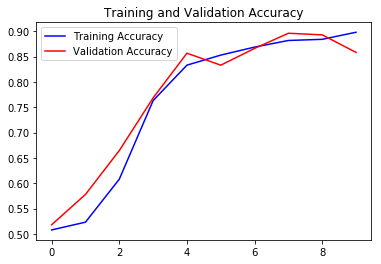

<Figure size 432x288 with 0 Axes>

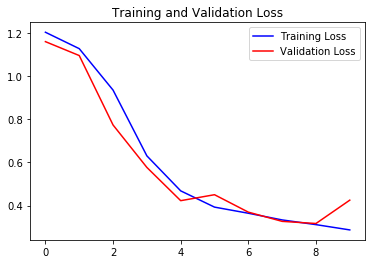

In [81]:
epochs = range(len(acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Model Testing

In [82]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


319/319 [==============================] - 3s 10ms/step
No of errors = 48/319


# Assignemnt
**You have to load the weights of previous model and with the help of previous weights try to create a CNN model with one more convolution layers. You have to train only after the newly added convolution layers of the neural network. **

Hint : Use model.load_weights('weights.h5', by_name=True)


In [128]:
new_model= models.Sequential()
new_model.load_weights('cnn_classification.h5', by_name=True)
new_model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
new_model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(32, activation='relu'))
new_model.add(layers.Dense(4, activation='softmax'))
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 4, 4, 32)          18464     
__________

### Training the model after 5rd layer


In [129]:
for layer in new_model.layers[:6]:
    layer.trainable = False

for layer in new_model.layers:
    print(layer, layer.trainable)
new_model.summary()

<keras.layers.convolutional.Conv2D object at 0x000000628708BA20> False
<keras.layers.pooling.MaxPooling2D object at 0x000000628708BE10> False
<keras.layers.convolutional.Conv2D object at 0x000000628708B940> False
<keras.layers.pooling.MaxPooling2D object at 0x0000006287B1A4E0> False
<keras.layers.convolutional.Conv2D object at 0x0000006287A65780> False
<keras.layers.pooling.MaxPooling2D object at 0x0000006287474828> False
<keras.layers.convolutional.Conv2D object at 0x0000006287B1A6D8> True
<keras.layers.convolutional.Conv2D object at 0x0000006287474DA0> True
<keras.layers.core.Flatten object at 0x0000006287AA4F98> True
<keras.layers.core.Dense object at 0x0000006287494198> True
<keras.layers.core.Dense object at 0x0000006287494048> True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 62, 62, 128)       3584      
______________________________________________________

In [132]:
# Here we are changing the learning rate from 0.001 to 0.01

In [131]:
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
new_model.compile(sgd, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
new_history = new_model.fit_generator(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10
139/138 [==============================] - 21s 153ms/step - loss: 1.1546 - acc: 0.5216 - val_loss: 1.0522 - val_acc: 0.5402
Epoch 2/10
139/138 [==============================] - 22s 156ms/step - loss: 0.9403 - acc: 0.5819 - val_loss: 0.8292 - val_acc: 0.6898
Epoch 3/10
139/138 [==============================] - 22s 157ms/step - loss: 0.7030 - acc: 0.7209 - val_loss: 0.6638 - val_acc: 0.7244
Epoch 4/10
139/138 [==============================] - 22s 156ms/step - loss: 0.6528 - acc: 0.7376 - val_loss: 0.7012 - val_acc: 0.6992
Epoch 5/10
139/138 [==============================] - 22s 161ms/step - loss: 0.5458 - acc: 0.7794 - val_loss: 0.5644 - val_acc: 0.7858
Epoch 6/10
139/138 [==============================] - 22s 161ms/step - loss: 0.5439 - acc: 0.7845 - val_loss: 0.6368 - val_acc: 0.7181
Epoch 7/10
139/138 [==============================] - 23s 165ms/step - loss: 0.5466 - acc: 0.7768 - val_loss: 0.5835 - val_acc: 0.7669
Epoch 8/10
139/138 [==============================] - 2

### C. Performance Measures

**Now we are going to plot the accuracy and loss **

In [133]:
train_acc = new_history.history['acc']
val_acc = new_history.history['val_acc']
train_loss = new_history.history['loss']
val_loss = new_history.history['val_loss']

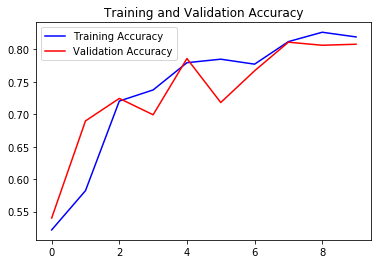

<Figure size 432x288 with 0 Axes>

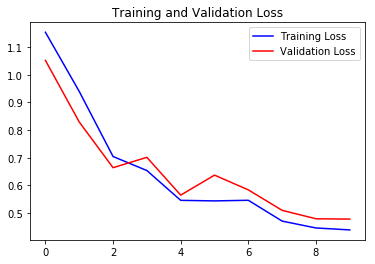

In [134]:
epochs = range(len(acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Model Testing

In [135]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


319/319 [==============================] - 3s 10ms/step
No of errors = 81/319
